In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from matplotlib import style
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [4]:
datos = pd.read_csv(filepath_or_buffer = "C:/Users/luish/Desktop/Programacion/Extraccion de Conocimientos de BD/UTEQ/Regresion_Lineal_2/data/Summary of Weather.csv",sep=',', low_memory=False)
datos

STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889        0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
1       25.555556        0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
2       24.444444        0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
3       24.444444        0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
4       24.444444        0         NaN  42  ... NaN  NaN NaN  NaN         NaN   
...           ...      ...         ...  ..  ...  ..  ...  ..  ...         ...   
119035  23.333333        0         NaN  45  ... NaN  NaN NaN  NaN         NaN   
119036  23.888889        0           1  45  ... NaN  NaN NaN  NaN           1   
119037  23.333333        0           1  45  ... NaN  NaN NaN  NaN           1   
119038  23.333333        0         NaN  45  ... NaN  NaN NaN  NaN         NaN   
119039  23.333333        0         NaN  45  ... NaN  NaN NaN  NaN         NaN   

        SD3  RHX  RHN RVG  WTE  
0       NaN  NaN  NaN NaN  NaN  
1       NaN  NaN  NaN NaN  NaN  
2       NaN  NaN  NaN NaN  NaN  
3       NaN  NaN  NaN NaN  NaN  
4       NaN  NaN  NaN NaN  NaN  
...     ...  ...  ...  ..  ...  
119035  NaN  NaN  NaN NaN  NaN  
119036  NaN  NaN  NaN NaN  NaN  
119037  NaN  NaN  NaN NaN  NaN  
119038  NaN  NaN  NaN NaN  NaN  
119039  NaN  NaN  NaN NaN  NaN  

[119040 rows x 31 columns]

In [6]:
datos.describe()

STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.000000   
25%        20.555556      43.000000       4.000000       8.000000   11.000000   
50%        25.555556      44.000000       7.000000      16.000000   32.000000   
75%        27.222222      45.000000      10.000000      23.000000   34.000000   
max        40.000000      45.000000      12.000000      31.000000   78.000000   

              SPD  ...   FT   FB  FTI  ITH         PGT  SD3  RHX  RHN  RVG  \
count  532.000000  ...  0.0  0.0  0.0  0.0  525.000000  0.0  0.0  0.0  0.0   
mean    20.396617  ...  NaN  NaN  NaN  NaN   12.085333  NaN  NaN  NaN  NaN   
std      5.560371  ...  NaN  NaN  NaN  NaN    5.731328  NaN  NaN  NaN  NaN   
min     10.000000  ...  NaN  NaN  NaN  NaN    0.000000  NaN  NaN  NaN  NaN   
25%     16.000000  ...  NaN  NaN  NaN  NaN    8.500000  NaN  NaN  NaN  NaN   
50%     20.000000  ...  NaN  NaN  NaN  NaN   11.600000  NaN  NaN  NaN  NaN   
75%     23.250000  ...  NaN  NaN  NaN  NaN   15.000000  NaN  NaN  NaN  NaN   
max     41.000000  ...  NaN  NaN  NaN  NaN   23.900000  NaN  NaN  NaN  NaN   

       WTE  
count  0.0  
mean   NaN  
std    NaN  
min    NaN  
25%    NaN  
50%    NaN  
75%    NaN  
max    NaN  

[8 rows x 24 columns]

In [8]:
#columnas y filas
datos.shape

(119040, 31)

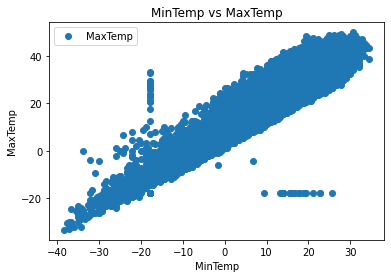

In [10]:
datos.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

c:\Users\luish\Desktop\Programacion\Extraccion de Conocimientos de BD\UTEQ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

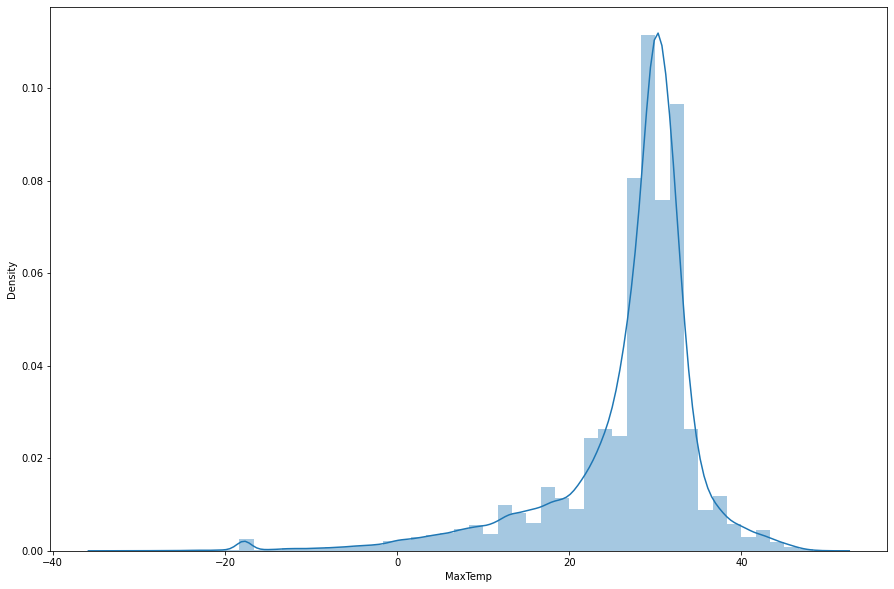

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(datos['MaxTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

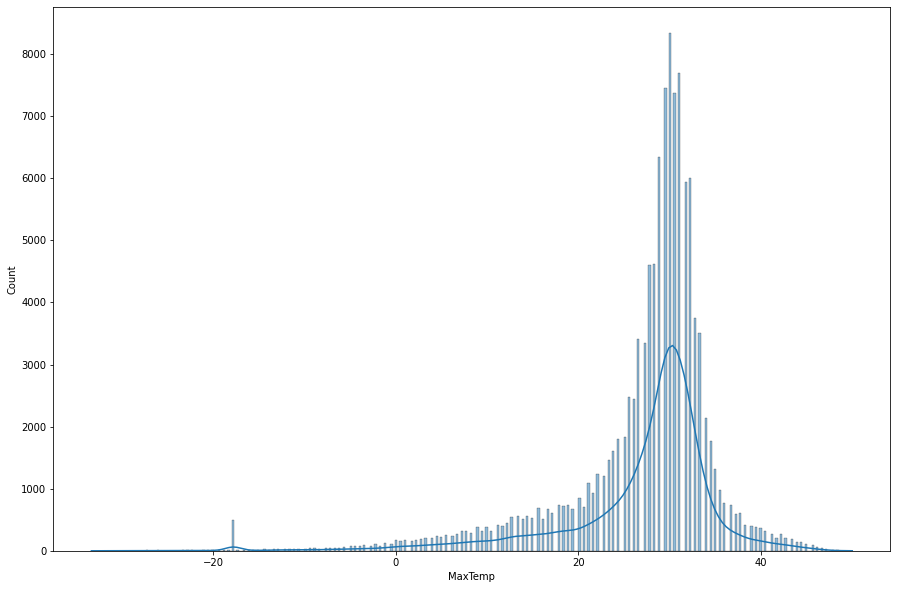

In [15]:
#Kde estilo de gráfica
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.histplot(datos['MaxTemp'],kde=True)

In [17]:
x = datos['MinTemp'].values.reshape(-1,1)
y = datos['MaxTemp'].values.reshape(-1,1)

In [19]:
#Definición y datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
regressor = LinearRegression()
regressor.fit(x_train, y_train) #Entrena al algoritm

LinearRegression()

In [23]:
#Para obtener el intercepto:
print(regressor.intercept_)
#Para obtener la pendiente
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [24]:
y_pred = regressor.predict(x_test)

In [26]:
# Asegurar que los valores a comparar son del mismo tamaño
print(len(y_test), len(y_pred))

23808 23808


In [28]:
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(datos2)

          Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]


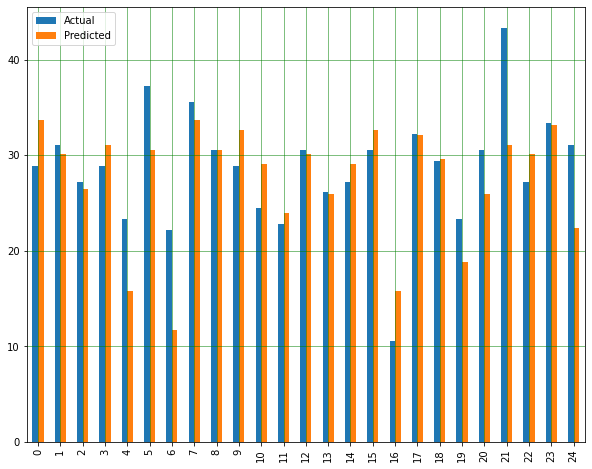

In [32]:
datos3 = datos2.head(25)
datos3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



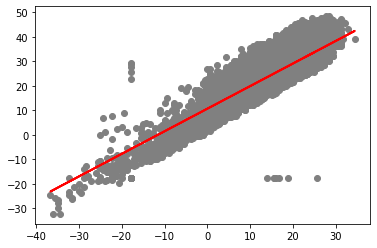

In [35]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red' , linewidth=2)
plt.show()

In [37]:
print('Error Absoluto Medio', metrics.mean_absolute_error(y_test, y_pred))

Error Absoluto Medio 3.1993291783785973


In [40]:
print('Error Cuadratico Medio', metrics.mean_squared_error(y_test, y_pred))

Error Cuadratico Medio 17.631568097568557


In [42]:
print('Raiz del Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Raiz del Error Cuadratico Medio 4.198996082109217
